In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.impute import KNNImputer
import warnings as w
w.filterwarnings ("ignore")


In [2]:
df=pd.read_csv("titanic.csv",na_values=["?","missing"])
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
PassengerId,892,893,894,895,896,897,898,899,900,901,...,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309
Survived,0,1,0,0,1,0,1,0,1,0,...,1,1,1,1,1,0,1,0,0,0
Pclass,3,3,2,3,3,3,3,2,3,3,...,3,3,3,1,3,3,1,3,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)","Svensson, Mr. Johan Cervin","Connolly, Miss. Kate","Caldwell, Mr. Albert Francis","Abrahim, Mrs. Joseph (Sophie Halaut Easu)","Davies, Mr. John Samuel",...,"Riordan, Miss. Johanna Hannah""""","Peacock, Miss. Treasteall","Naughton, Miss. Hannah","Minahan, Mrs. William Edward (Lillian E Thorpe)","Henriksson, Miss. Jenny Lovisa","Spector, Mr. Woolf","Oliva y Ocana, Dona. Fermina","Saether, Mr. Simon Sivertsen","Ware, Mr. Frederick","Peter, Master. Michael J"
Sex,male,female,male,male,female,male,female,male,female,male,...,female,female,female,female,female,male,female,male,male,male
Age,34.5,47.0,62.0,27.0,22.0,14.0,30.0,26.0,18.0,21.0,...,NaN,3.0,NaN,37.0,28.0,NaN,39.0,38.5,NaN,NaN
SibSp,0,1,0,0,1,0,0,1,0,2,...,0,1,0,1,0,0,0,0,0,1
Parch,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298,7538,330972,248738,2657,A/4 48871,...,334915,SOTON/O.Q. 3101315,365237,19928,347086,A.5. 3236,PC 17758,SOTON/O.Q. 3101262,359309,2668
Fare,7.8292,7.0,9.6875,8.6625,12.2875,9.225,7.6292,29.0,7.2292,24.15,...,7.7208,13.775,7.75,90.0,7.775,8.05,108.9,7.25,8.05,22.3583


In [4]:
df = df.drop(['PassengerId', 'Name', 
              'Ticket', 'Cabin'], axis=1)

In [5]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [6]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [7]:
from sklearn.impute import KNNImputer

In [8]:
category_variables = df[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(category_variables, drop_first=True)
cat_dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,1,0
1,0,0,1
2,1,1,0
3,1,0,1
4,0,0,1


In [9]:
df = df.drop(['Sex', 'Embarked'], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1


In [10]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0
1,1.0,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0
2,0.0,2.0,62.0,0.0,0.0,9.6875,1.0,1.0,0.0
3,0.0,3.0,27.0,0.0,0.0,8.6625,1.0,0.0,1.0
4,1.0,3.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,0.0,3.0,33.3,0.0,0.0,8.0500,1.0,0.0,1.0
414,1.0,1.0,39.0,0.0,0.0,108.9000,0.0,0.0,0.0
415,0.0,3.0,38.5,0.0,0.0,7.2500,1.0,0.0,1.0
416,0.0,3.0,33.3,0.0,0.0,8.0500,1.0,0.0,1.0


In [11]:
df.isna().any()

Survived      False
Pclass        False
Age           False
SibSp         False
Parch         False
Fare          False
Sex_male      False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [12]:
df.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

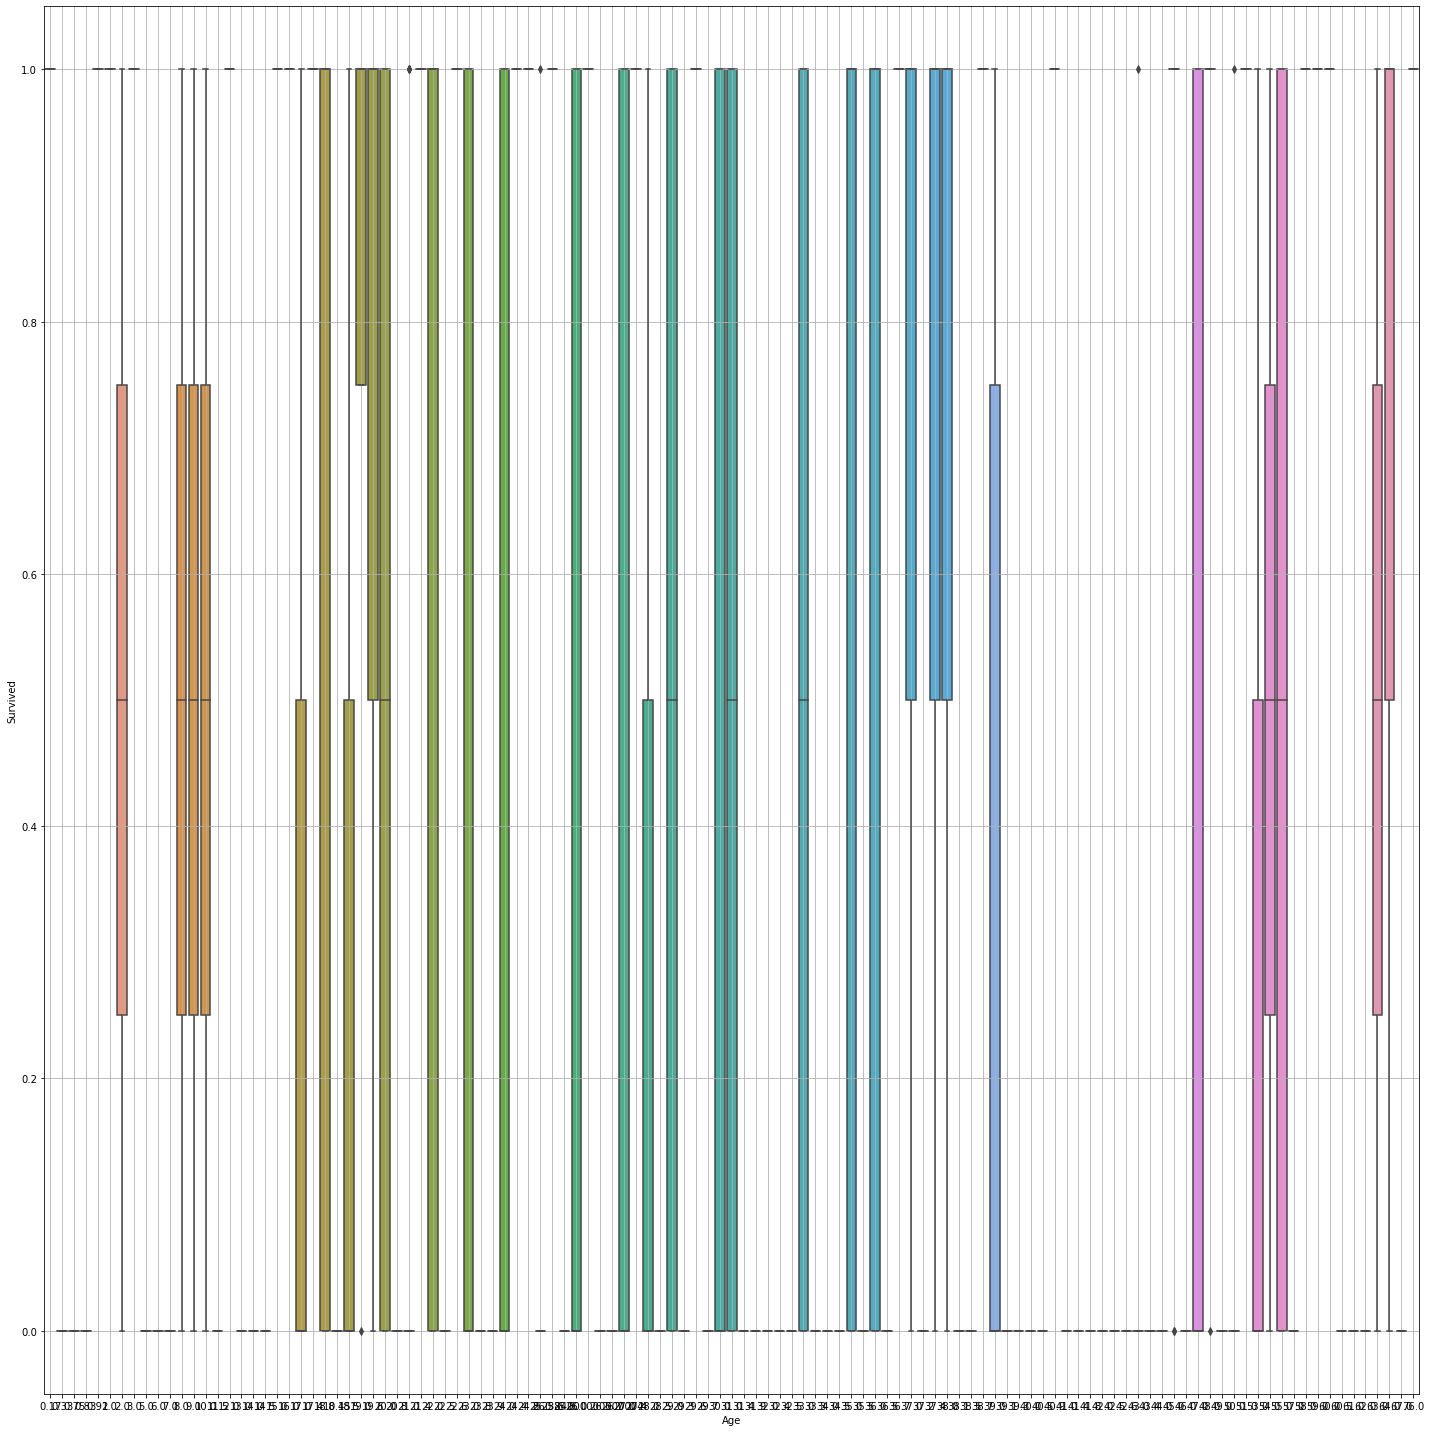

In [36]:
plt.figure(figsize=(20,20))
sns.boxplot(x=df["Age"] ,y=df["Survived"])
plt.tight_layout()
plt.grid()

In [14]:
corr=df.corr()

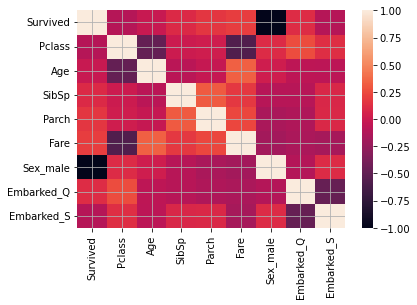

In [15]:
sns.heatmap(corr)
plt.grid();

In [33]:
skd=skew(df)

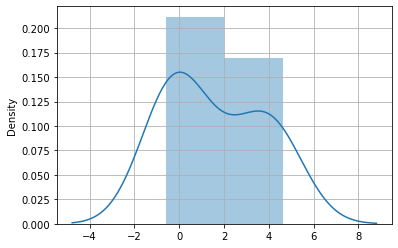

In [34]:
sns.distplot(x=[skd])
plt.grid();